<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen3_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 3

### Integrantes

- Andres Felipe Borrero
- Yesid Castelblanco
- Nicolas Colmenares
- Carlos Alberto Martinez

### **Profesores**

- Santiago Ortiz
- Henry Velasco

**Notas:**
-	Todas las respuestas, gráficas, tablas y operaciones deben ser debidamente justificadas.
-	La información que sea obtenida de alguna fuente debe ser citada y referenciada en el documento a entregar.


# Ejercicio 4

4)	El fichero de datos *“Dengue_Data.xlsx”* contiene información epidemiológica de los casos de Dengue en el Departamento de Antioquia. Estos datos contienen tanto información socio-económica como clínica de las personas que resultaron infectadas y desarrollaron Dengue o Dengue Hemorrágico. Para una completa descripción de los datos y/o fenómeno estudiado, remítase al siguiente artículo *Identification of Hazard and Socio-Demographic Patterns of Dengue Infections in a Colombian Subtropical Region from 2015 to 2020: Cox Regression Models and Statistical Analysis.

*Realizar.

* Utilizando solo las variables socio-demográficas, ajuste un modelo Logit y los modelos Logit-Ridge, Logit-LASSO y Logit-Enet (con sus parámetros óptimos, por supuesto) para predecir si una persona va a desarrollar “DENGUE” o “DENGUE GRAVE”. Interprete los resultados de cada modelo y compárelos; defina que variables son las más importantes par predecir el estado categórico modelado, muestre los gráficos de penalidad y de evolución de coeficientes. * Concluya sobre el fenómeno estudiado y a información del artículo.
* Realice el mismo ejercicio anterior, solo que ahora considere como variables explicativas las variables de tipo clínico/médico para modelar si una persona requiere o no ser hospitali- zada. Realice los mismos análisis y procedimientos. Concluya en función de la información presentada en el artículo.


In [167]:
# Tratamiento de datos
# ==============================================================================
# Pandas es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
import pandas as pd
# NumPy es una librería de Python que proporciona estructuras de datos y operaciones matemáticas de alto rendimiento.
import numpy as np

# Gráficos
# ==============================================================================
#Matplotlib.pyplot es una librería de Python que proporciona herramientas de visualización y gráficos de alta calidad.
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import Math, Latex
from IPython.core.display import Image
#Seaborn es una librería de Python que proporciona herramientas de visualización y análisis de datos de alta calidad.
import seaborn as sns

# Métricas
# ==============================================================================
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from tqdm.auto import tqdm
import time

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Configuración seaborn
# ==============================================================================
#sns.set(color_codes=True) es un método de la librería Seaborn que establece los códigos de color predeterminados para los gráficos y diagramas. Cuando se establece color_codes=True, Seaborn utiliza una paleta de colores predefinida y asigna un código de color a cada categoría o variable en los gráficos y diagramas.
sns.set(color_codes=True)
#Cuando se establece rc={'figure.figsize':(10,6)}, Seaborn crea figuras con un tamaño de 10 unidades de ancho y 6 unidades de alto.
sns.set(rc={'figure.figsize':(10,6)})

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

#Datos
Contiene información epidemiológica de los casos de Dengue en el Departamento de Antioquia. Estos datos contienen tanto información socio-económica como clínica de las personas que resultaron infectadas y desarrollaron Dengue o Dengue Hemorrágico

In [168]:
url = 'https://github.com/cam2149/MachinelearningI/raw/19a9b08e636dd80915a4727c674a04c64a962b59/Dengue_Data.xlsx'
dfDengue = pd.read_excel(url, sheet_name='datos_2')

In [169]:
dfDengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edad_                          50397 non-null  int64         
 1   Grupos edad                    50397 non-null  object        
 2   sexo_                          50397 non-null  object        
 3   area_                          50397 non-null  object        
 4   area_.1                        50397 non-null  object        
 5   area_.2                        50397 non-null  object        
 6   ocupacion_                     50397 non-null  object        
 7   per_etn_                       50397 non-null  object        
 8   gp_discapa                     49661 non-null  object        
 9   gp_desplaz                     49676 non-null  object        
 10  gp_migrant                     49696 non-null  object        
 11  gp_carcela     

In [170]:
##Ajuste de los valores de los encabezados
newHeaders = 'Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2','Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes',      'Prisionero', 'Embarazada', 'Indigena', 'Pobreza', 'Gestante','Desmovilizado', 'VictimaViolencia', 'Otros', 'FechaConsulta', 'InicioSintomas','TipoConsulta', 'Hospitalizado', 'FechaHospitalizacion','TiempodeDeterioro', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario',               'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea','Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia','CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Extravasacion', 'Hemorroides','Choque', 'DanioOrgano', 'Evento', 'Region'

dfDengue.columns = newHeaders


#Análisis exploratorio de los datos.


In [171]:
dfDengue.describe()

,Edad,FechaConsulta,InicioSintomas,TipoConsulta,FechaHospitalizacion,TiempodeDeterioro
count,50397.000000,50386,50384,50384.000000,14960,14959.000000
mean,29.609858,2017-01-25 06:06:35.252649728,2017-01-20 20:32:11.470307840,4.410349,2017-03-31 07:13:03.529411584,5.136841
min,1.000000,2015-01-04 00:00:00,2014-12-30 00:00:00,0.000000,2015-01-04 00:00:00,0.000000
25%,14.000000,2016-04-05 00:00:00,2016-04-01 00:00:00,2.000000,2016-03-23 00:00:00,3.000000
50%,26.000000,2016-08-01 00:00:00,2016-07-27 00:00:00,4.000000,2016-08-09 00:00:00,4.000000
75%,42.000000,2017-07-19 00:00:00,2017-07-15 00:00:00,5.000000,2018-08-06 00:00:00,6.000000
max,131.000000,2021-02-09 00:00:00,2021-01-02 00:00:00,374.000000,2021-01-11 00:00:00,373.000000
std,19.029978,NaN,NaN,9.448480,NaN,11.527729


In [172]:
dfDengue.head()

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,Evento,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA


In [173]:
dfDengue.tail()

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,Evento,Region
50392,6,Infancia,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,No,Sí,No,No,No,DENGUE GRAVE,VALLE DE ABURRA
50393,9,Infancia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,No,Sí,No,No,Sí,No,No,No,DENGUE GRAVE,URABA
50394,17,Adolescencia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,Otro,No,No,...,No,Sí,No,Sí,No,Sí,No,No,DENGUE GRAVE,URABA
50395,24,Juventud,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,No,Sí,No,Sí,Sí,DENGUE GRAVE,BAJO CAUCA
50396,43,Adultez,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,No,No,No,Sí,DENGUE GRAVE,NORDESTE


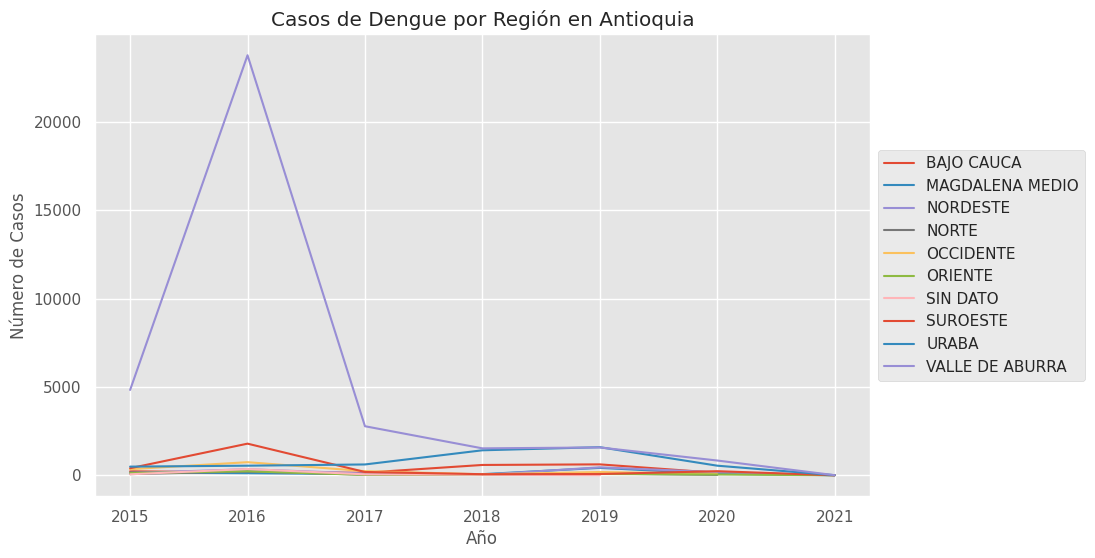

In [174]:
# Grafico de los casos registrados por region en todos los años por region
casos_por_region_y_año = dfDengue.groupby(['Region', dfDengue['FechaConsulta'].dt.year])['Region'].count().unstack()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre las regiones y crear un gráfico de líneas para cada una
for region in casos_por_region_y_año.index:
  ax.plot(casos_por_region_y_año.columns, casos_por_region_y_año.loc[region], label=region)

# Ajustar la leyenda para que las regiones
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Casos de Dengue por Región en Antioquia')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Casos')

# Mostrar el gráfico
plt.show()

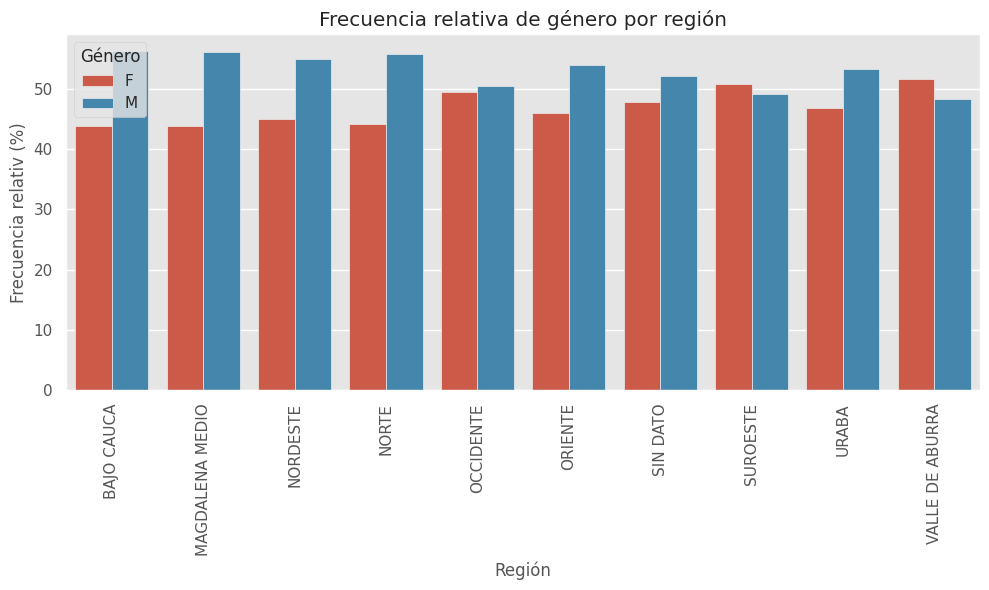

In [175]:
# Grafico de la frecencia relatica de los casos de denge registrados agrupados por Región y genero
genero_freq_by_region = dfDengue.groupby(['Region', 'Genero'])['Genero'].count() / dfDengue.groupby('Region')['Genero'].count() * 100
genero_freq_by_region = genero_freq_by_region.reset_index(name='Relative Frequency')
# Crear una figura y ejes
sns.barplot(x='Region', y='Relative Frequency', hue='Genero', data=genero_freq_by_region)
# Ajustar la leyenda para que las regiones
plt.title('Frecuencia relativa de género por región')
plt.xlabel('Región')
plt.ylabel('Frecuencia relativ (%)')
plt.xticks(rotation=90)
plt.legend(title='Género')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

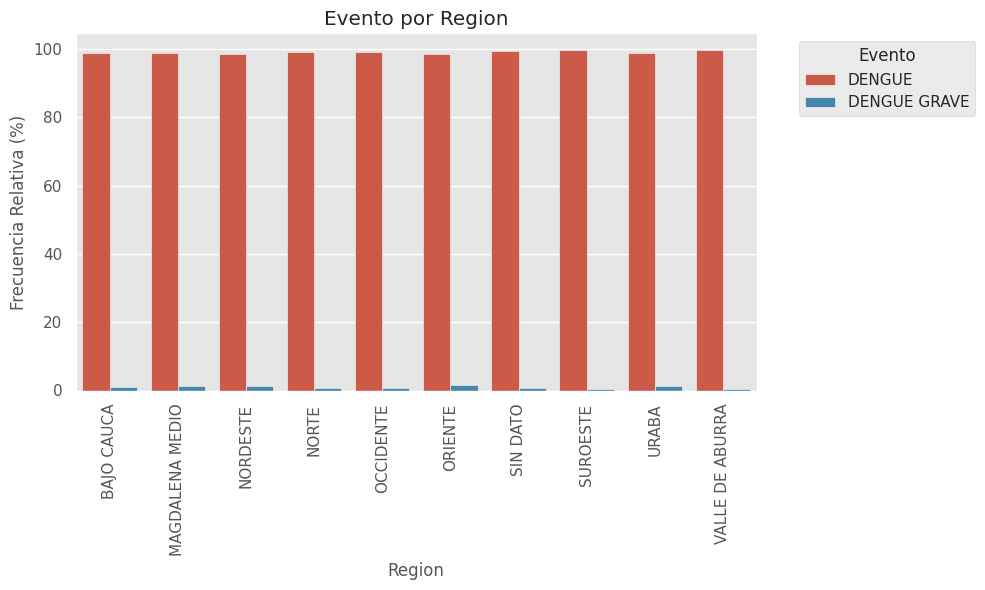

In [176]:
# Grafico de la frecencia relativa de los casos de Denge registrados agrupados por Región
nombre_evento_freq_by_region = dfDengue.groupby(['Region', 'Evento'])['Evento'].count() / dfDengue.groupby('Region')['Evento'].count() * 100
nombre_evento_freq_by_region = nombre_evento_freq_by_region.reset_index(name='Relative Frequency')
# Crear una figura y ejes
sns.barplot(x='Region', y='Relative Frequency', hue='Evento', data=nombre_evento_freq_by_region)
# Ajustar la leyenda para que las regiones
plt.title('Evento por Region')
plt.xlabel('Region')
plt.ylabel('Frecuencia Relativa (%)')
plt.xticks(rotation=90)
plt.legend(title='Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

#Limpieza de Datos

In [177]:
dfDengue.isna().sum()

,0
Edad,0
GrupoEdad,0
Genero,0
Area,0
Area1,0
Area2,0
Ocupacion,0
Etnia,0
Discapacidad,736
Desplazados,721


En el  conjunto de datos se indetifican una gran cantidad de datos nulos Discapacidad	736, Desplazados	721, Inmigrantes	701, Prisionero	716, Embarazada	25556, Indigena	706, Pobreza	709, Gestante	25582, Desmovilizado	702, VictimaViolencia	696, Otros	20, FechaConsulta	11, InicioSintomas	13, TipoConsulta	13, FechaHospitalizacion	35437, TiempodeDeterioro	35438, Fiebre	9, DolorCabeza	9, DolorRetroOrbitario	9, DolorMuscular	9, DolorArticular	9, ErupcionCutanea	9, DolorAbdominal	13, Vomitos	13, Diarrea	13, Somnolencia	754, Hipotension	13, Hepatomegalia	13, HemMucosa	752, Hipotermia	751, CaidaPlaquetas	749, AcumulacionLiquido	750, AumentoHematocritos	752, Extravasacion	50108, Hemorroides	50108, Choque	49294, DanioOrgano	50108
* Eliminar filas que todos sus datos son nulos
* Se realizara el replace correspondiente por valor 0, a las se identifican como respuesta [Si o No] o [Sí o No]
* La columna Evento se hará el reemplazo {"DENGUE": 1, "DENGUE GRAVE": 2}  
* La Columna Genero se hará el reemplazo {"M": 1, "F": 0}

In [178]:
# Eliminar filas con datos nulos
countCollumns = len(dfDengue)
dfDengue.dropna(how='all', inplace=True)

# Describir el efecto de la eliminación
print("Número de filas antes de eliminar datos nulos:", countCollumns)
print("Número de filas después de eliminar datos nulos:", len(dfDengue))
print("Número de filas eliminadas:", len(dfDengue) - countCollumns)

Número de filas antes de eliminar datos nulos: 50397
Número de filas después de eliminar datos nulos: 50397
Número de filas eliminadas: 0


In [179]:
# Eliminar columnas con una cantidad significativa de valores nulos, más del 50%
threshold = 0.5  # Umbral para la proporción de valores nulos
countCollumns = len(dfDengue.columns) # Cantidad de columnas del dataset
dfDengue.dropna(thresh=len(dfDengue) * threshold, axis=1, inplace=True)

# Imprimir la cantidad de columnas eliminadas
print(f"Se eliminaron {len(dfDengue.columns) - countCollumns} columnas con más del {threshold * 100}% de valores nulos.")

# Mostrar las columnas restantes
print("Columnas restantes:", dfDengue.columns.tolist())

Se eliminaron -8 columnas con más del 50.0% de valores nulos.
Columnas restantes: ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza', 'Desmovilizado', 'VictimaViolencia', 'Otros', 'FechaConsulta', 'InicioSintomas', 'TipoConsulta', 'Hospitalizado', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario', 'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea', 'Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia', 'CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Evento', 'Region']


In [180]:
# Eliminar columnas de fechas no significativas para la prediccion de la variable objetivo Evento
columns_to_drop = ['FechaConsulta', 'InicioSintomas']
dfDengue.drop(columns = columns_to_drop, inplace=True)
# Mostrar las columnas restantes
print("Columnas restantes:", dfDengue.columns.tolist())

Columnas restantes: ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza', 'Desmovilizado', 'VictimaViolencia', 'Otros', 'TipoConsulta', 'Hospitalizado', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario', 'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea', 'Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia', 'CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Evento', 'Region']


In [181]:
# Recorrer todos los campos y si su valor es NaN convertir en un 0, si el en valor es No en 0 o si el valor es Si en 1
excluded_columns = ['Evento', 'Genero']
for column in dfDengue.columns:
  if column not in excluded_columns:
    # Reemplazar valoes NaN con 0
    dfDengue[column].fillna(0, inplace=True)


# Reemplazar "No" con 0 y "Si" con 1
# dfDengue[column] = dfDengue[column].replace({"No": 0, "Si": 1})
# dfDengue[column] = dfDengue[column].replace({"No": 0, "Sí": 1})
# Reemplazar "DENGUE" con 1 and "DENGUE GRAVE" con 2
#dfDengue['Evento'] = dfDengue['Evento'].replace({"DENGUE": 1, "DENGUE GRAVE": 2}, inplace=True)
#dfDengue['Genero'] = dfDengue['Genero'].replace({'M': 1, 'F': 0}, inplace=True)

In [182]:
dfDengue.isna().sum()

,0
Edad,50397
GrupoEdad,50397
Genero,50397
Area,50397
Area1,50397
Area2,50397
Ocupacion,50397
Etnia,50397
Discapacidad,50397
Desplazados,50397


In [145]:
dfDengue.describe()

,Edad,Genero,Discapacidad,Desplazados,Inmigrantes,Prisionero,Indigena,Pobreza,Desmovilizado,VictimaViolencia,...,Vomitos,Diarrea,Somnolencia,Hipotension,Hepatomegalia,HemMucosa,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos
count,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,...,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000,50397.000000
mean,29.609858,0.497212,0.002143,0.005437,0.003631,0.000992,0.001151,0.000794,0.000694,0.001667,...,0.229895,0.150882,0.033018,0.016330,0.012282,0.037264,0.004603,0.218108,0.013354,0.032542
std,19.029978,0.499997,0.046243,0.073535,0.060150,0.031483,0.033905,0.028162,0.026344,0.040792,...,0.420769,0.357937,0.178685,0.126744,0.110145,0.189410,0.067693,0.412965,0.114786,0.177435
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
unique_nombre_evento_counts = dfDengue['Evento'].value_counts()
unique_nombre_evento_counts

,count
Evento,
DENGUE,50101
DENGUE GRAVE,296


In [102]:
# Se seleccionan las columnas a estandarizar
columns_to_standardize = ['GrupoEdad', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Region']
dfDengue_scaled = dfDengue.copy()
scaler = StandardScaler()

# Convertir valores de cadena en representaciones numéricas usando codificación de etiquetas
# Esto es necesario antes de escalar porque StandardScaler trabaja con datos numéricos.
for column in columns_to_standardize:
  if dfDengue_scaled[column].dtype == 'object':
    unique_values = dfDengue_scaled[column].unique()
    value_mapping = {value: index for index, value in enumerate(unique_values)}

    # Reemplazar valores de cadena con etiquetas numéricas
    dfDengue_scaled[column] = dfDengue_scaled[column].map(value_mapping)

# Se ajusta y transforma las columnas seleccionadas.
dfDengue_scaled[columns_to_standardize] = scaler.fit_transform(dfDengue_scaled[columns_to_standardize])

# Calculo de la matriz de correlación.
correlation_matrix = dfDengue_scaled.corr()
correlation_matrix

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Somnolencia,Hipotension,Hepatomegalia,HemMucosa,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,NombreEvento,Region
Edad,1.000000,0.169692,-0.076341,-0.017549,-0.000122,-0.000122,0.166992,0.033459,0.003678,-0.009077,...,-0.014979,0.028145,-0.016657,-0.039677,0.001487,0.015325,-0.012912,-0.002922,-0.002600,-0.045326
GrupoEdad,0.169692,1.000000,0.001434,-0.008921,-0.012119,-0.012119,-0.086700,-0.002339,0.010976,0.000267,...,-0.004825,0.022316,-0.004021,0.012816,0.008835,0.036190,-0.010041,0.019681,0.011731,0.011246
Genero,-0.076341,0.001434,1.000000,0.017463,-0.016062,-0.016062,0.140339,-0.011043,0.007124,0.008508,...,0.004362,-0.005074,0.002243,0.005497,-0.002552,-0.000130,-0.002636,0.020034,-0.000091,0.032494
Area,-0.017549,-0.008921,0.017463,1.000000,0.525462,0.525462,0.005060,-0.001262,0.013962,-0.007536,...,0.019605,0.004966,0.000908,-0.015851,0.002593,-0.006627,-0.000981,-0.001433,0.007156,0.018341
Area1,-0.000122,-0.012119,-0.016062,0.525462,1.000000,1.000000,0.008302,0.008344,-0.001478,-0.020246,...,0.008953,-0.006524,0.002867,-0.015179,0.001103,-0.038170,-0.006449,0.000486,-0.008830,-0.085090
Area2,-0.000122,-0.012119,-0.016062,0.525462,1.000000,1.000000,0.008302,0.008344,-0.001478,-0.020246,...,0.008953,-0.006524,0.002867,-0.015179,0.001103,-0.038170,-0.006449,0.000486,-0.008830,-0.085090
Ocupacion,0.166992,-0.086700,0.140339,0.005060,0.008302,0.008302,1.000000,0.022134,-0.004719,-0.000580,...,-0.010256,-0.009845,-0.009413,-0.003798,-0.009850,-0.020353,-0.018330,0.003606,-0.012258,0.012941
Etnia,0.033459,-0.002339,-0.011043,-0.001262,0.008344,0.008344,0.022134,1.000000,0.016973,0.007690,...,-0.003487,0.008192,-0.003951,0.001940,0.006416,-0.003222,0.005373,0.004694,0.005578,0.064321
Discapacidad,0.003678,0.010976,0.007124,0.013962,-0.001478,-0.001478,-0.004719,0.016973,1.000000,0.194974,...,0.015451,0.010957,-0.001272,-0.004586,0.003187,0.007735,-0.001653,-0.006081,-0.003562,0.011676
Desplazados,-0.009077,0.000267,0.008508,-0.007536,-0.020246,-0.020246,-0.000580,0.007690,0.194974,1.000000,...,0.012010,0.005377,-0.003345,0.002550,0.010917,0.022372,0.007854,0.004690,0.011974,0.034793


#Modelos

###Filtrando las variables socio-demográficas

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: uno de entrenamiento (70%) y otro de test (30%).

In [104]:
# Mostrar las columnas actuales
dfDengue = dfDengue_scaled
print("Columnas", dfDengue.columns.tolist())

Columnas ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2', 'Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza', 'Desmovilizado', 'VictimaViolencia', 'Otros', 'TipoConsulta', 'Hospitalizado', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario', 'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea', 'Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia', 'CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'NombreEvento', 'Region']


In [105]:
# Filtrar las variables socio-demográficas
socio_demo_vars = ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2','Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Indigena', 'Pobreza', 'Desmovilizado', 'VictimaViolencia', 'Otros', 'Region', 'NombreEvento']
dfDengueSocioDemo = dfDengue[socio_demo_vars].copy()

# Definir variables predictoras (X) y variable objetivo (y)
X = dfDengueSocioDemo.drop('NombreEvento', axis=1)
y = (dfDengueSocioDemo['NombreEvento'] == 2).astype(int)

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Modelo de regresión lineal con variables estandarizadas

In [106]:

# Dividir los datos en conjuntos de entrenamiento y prueba (opcional, para evaluar el modelo)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustar modelo Logit
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)


LogisticRegression()

In [108]:
logit_model.score(X_train, y_train)

0.994103807013068

Un score de 0.9941 indica que el modelo tiene un buen desempeño, con alta precisión en la predicción del desarrollo del 'Dengue Grave'

Coeficientes: [[-0.02463779  0.1060794  -0.01242077  0.15153646 -0.08657495 -0.08657495
  -0.1430578   0.05412448 -0.10153848 -0.05355087  0.04529365  0.04529426
  -0.09236615 -0.12628572 -0.14591191  0.05031221 -0.15329212  0.0907196 ]]
Intercepto: [-5.20573668]


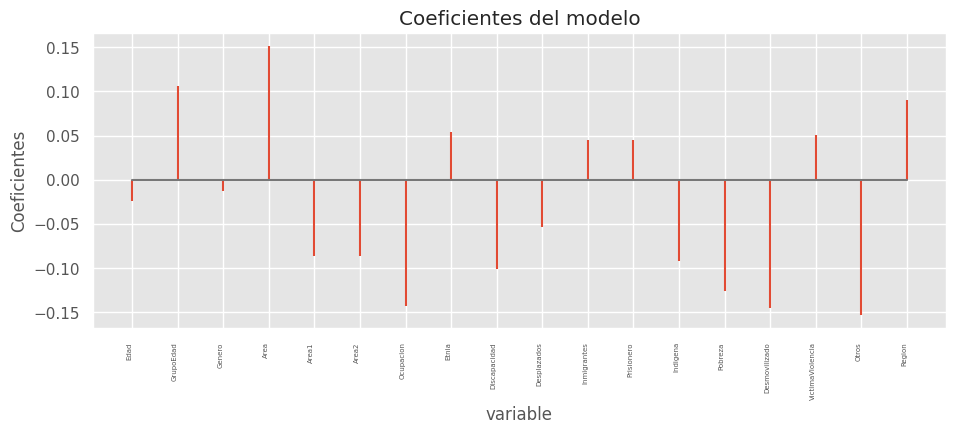

In [109]:
# Coeficientes del modelo
# ==============================================================================
coefficients = logit_model.coef_
intercept = logit_model.intercept_

print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
dfDenge_coeficientes = pd.DataFrame({'predictor': X.columns, 'coef': logit_model.coef_[0]})

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(dfDenge_coeficientes.predictor, dfDenge_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo');

In [110]:
# Predicciones test
# ==============================================================================
predicciones = logit_model.predict(X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
# Error de test del modelo
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.07628961803617725


In [112]:
residuals = y_test - predicciones
print("Media de los resideales:", np.mean(residuals))
print("Desviación estándar de los residuales:", np.std(residuals))


Media de los resideales: 0.00582010582010582
Desviación estándar de los residuales: 0.07606728724193036


Las predicciones del modelo final se alejan en promedio 0.076 unidades del valor real.



In [115]:

# Ajustar modelo Logit-Ridge
param_grid_ridge = {'C': np.logspace(-4, 4, 20), 'penalty': ['l2']}
ridge_model = RidgeCV(LogisticRegression(), param_grid_ridge, cv=5)
ridge_model.fit(X_train, y_train)


TypeError: _BaseRidgeCV.__init__() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [ ]:
ridge_model.score(X_train, y_train)

0.994245603591537

In [ ]:

# Ajustar modelo Logit-LASSO
param_grid_lasso = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1'], 'solver': ['liblinear']}
lasso_model = GridSearchCV(LogisticRegression(), param_grid_lasso, cv=5)
lasso_model.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1'], 'solver': ['liblinear']})

In [ ]:
lasso_model.score(X_train, y_train)

0.994245603591537

In [ ]:

# Ajustar modelo Logit-Enet
param_grid_enet = {'C': np.logspace(-4, 4, 20), 'penalty': ['elasticnet'], 'l1_ratio': np.linspace(0, 1, 10), 'solver': ['saga']}
enet_model = GridSearchCV(LogisticRegression(), param_grid_enet, cv=5)
enet_model.fit(X_scaled, y)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['elasticnet'], 'solver': ['saga']})

In [ ]:
enet_model.score(X_train, y_train)

0.994245603591537

In [ ]:

# Interpretar resultados, comparar modelos, identificar variables importantes,
# graficar penalidad y evolución de coeficientes

# ... (Agregar código para interpretar los resultados de cada modelo)

# Conclusión sobre el fenómeno estudiado y la información del artículo
# ... (Escribir una conclusión basada en los resultados de los modelos y la información del artículo)